<a href="https://colab.research.google.com/github/Darshan235/NLP/blob/main/NLP_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Sentiment Analysis (Negative Sentiment TF-IDF)

This notebook loads the Twitter US Airline Sentiment dataset, preprocesses tweets, computes TF-IDF, and visualizes top negative sentiment terms.

In [1]:
# Install required libraries (run once)
!pip install pandas numpy scikit-learn nltk matplotlib wordcloud

In [9]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Added to resolve LookupError

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
# Load dataset (update path after downloading from Kaggle)
df = pd.read_csv("Tweets.csv")
df = df[['text', 'airline_sentiment']]
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [10]:
# Text preprocessing
stop_words = set(stopwords.words('english'))

def clean_tweet(text):
    text = re.sub(r"http\S+|www\S+", "", text)   # remove URLs
    text = re.sub(r"@[A-Za-z0-9_]+", "", text)     # remove mentions
    text = re.sub(r"#\w+", "", text)              # remove hashtags
    text = re.sub(r"[^a-zA-Z ]", "", text)
    tokens = word_tokenize(text.lower())
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_tweet)
df.head()

,text,airline_sentiment,clean_text
0,@VirginAmerica What @dhepburn said.,neutral,said
1,@VirginAmerica plus you've added commercials t...,positive,plus youve added commercials experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,neutral,didnt today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,negative,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,negative,really big bad thing


In [11]:
# Filter negative sentiment tweets
neg_df = df[df['airline_sentiment'] == 'negative']

In [12]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(neg_df['clean_text'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head()

,aa,able,absolute,absolutely,acceptable,access,accommodate,account,actual,actually,...,year,years,yes,yesterday,yet,youll,youre,youve,yr,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Top TF-IDF terms (average score)
top_terms = tfidf_df.mean(axis=0).sort_values(ascending=False).head(15)
top_terms

,0
flight,0.049564
get,0.023834
cancelled,0.021974
service,0.020094
hours,0.017978
hold,0.017853
customer,0.017246
help,0.016586
time,0.015804
im,0.015623


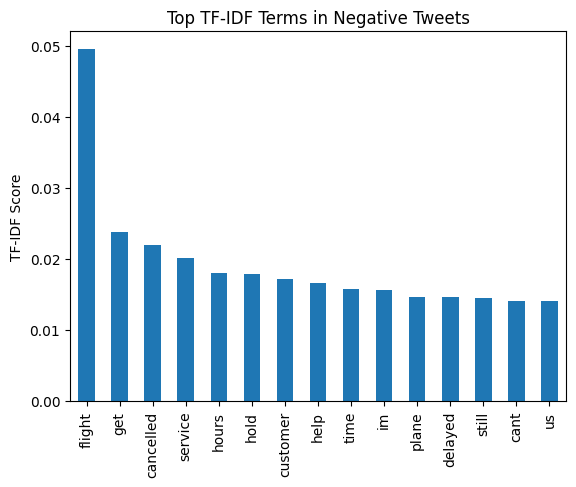

In [14]:
# Bar chart of top negative sentiment terms
plt.figure()
top_terms.plot(kind='bar')
plt.title("Top TF-IDF Terms in Negative Tweets")
plt.ylabel("TF-IDF Score")
plt.show()

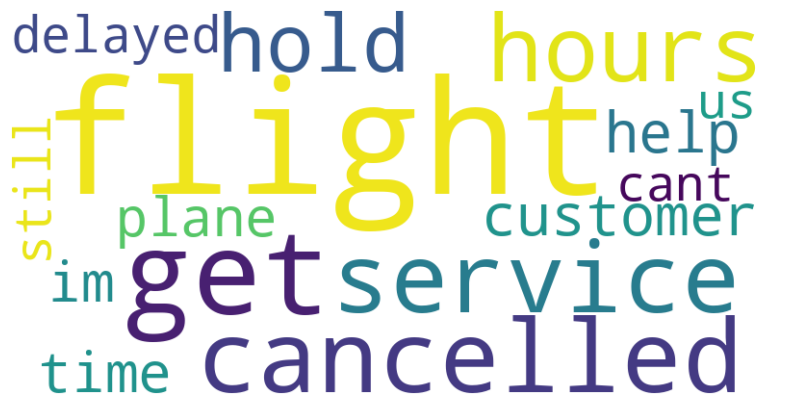

In [15]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_terms)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()